$$\Huge \textbf{Background}$$

There are algorithms for calculation multipication of $n$-digits numbers $x$ and $y$:
$$
\begin{array}{ll}
\textbf{Proposed by} & \textbf{Complexity}\\
Standart\, algorithm & O(n^2)\\
Karatsuba\, (1960) & O(n^{\log_2{3}})\\
Toom \,(1963) & O(n^{\log_3{5}})\\
Tomm-Cook \,(1966) & O(n^{\log_k(2k+1)})\\
Schönhage-Strassen\,(1971) & O(n \log(n) \log \log(n))\\
Fürer\, (2007) & O(n\log(n)16^{\log^*(n)})\\
Harvey-Hoeven \,(2019) & O(n\log(n))\\
\end{array}
$$

In Python for long integers the faster algorithms are used (https://hg.python.org/cpython/file/b514339e41ef/Objects/longobject.c#l2694).

Here we'll consider Karasuba's algorithm.

$$\huge \textbf{Karasuba's algorithm}$$

Let $x$ and $y$ are $n$-digit numbers, where $n=2^k$. 
$$
\begin{array}{l}
x=10^{\frac{n}{2}}a+b\\
y=10^{\frac{n}{2}}c+d
\end{array}
$$
where $a,\,b,\,c$ and $d$ are at most $\frac{n}{2}$-digit numbers.

By the above representation one can express $x\cdot y$ as

$$x \cdot y = \left( 10^{\frac{n}{2}}a+b\right) \cdot \left( 10^{\frac{n}{2}}c+d\right)=10^nac+10^{\frac{n}{2}}(ad+bc)+bd \qquad\qquad\qquad\qquad (*)$$

Karasuba offered rewrite $(*)$ as
$$x\cdot y=T_2 10^n + (T_1-T_0-T_2)10^{\frac{n}{2}}+T_0 \qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\;\;\;(**)$$

which instead of 4 multiplications ($ac,\, ad,\, bc,\,bd$) in $(*)$ the multiplication $x \cdot y$ can be computed with 3 multiplications using new variables $T_0=bd,\, T_1=(a+b)(c+d),\, T_2 =ac$.

# Realization Karasuba's algorithm in Python

In [2]:
def Karatsuba(x,y):
    
    if x <=10 and y <= 10:
        return x*y

    n = max(len(str(x)), len(str(y)))
    m = n//2

    p=10**m
    a  =x // p
    b = x % p
    
    c  = y // p
    d = y % p

    T0 = Karatsuba(b,d)
    T1 = Karatsuba(a + b, c + d) 
    T2 = Karatsuba(a,c)

    return T2*(10**(2*m)) + (T1-T0-T2)*(10**m) + T0

$$\huge \textbf{Complexity of Karasuba's algorithm}$$

Let $T(n)$ be the running time of Karasuba's algorithm. 

Due to this algorithm, one can write recursive relation:

$$T(n)=3\cdot T\left( \frac{n}{2}\right)+O(n)$$

Let us derive asymptotic formula for $T(n)$.

$$T(n)=3^2\cdot T\left( \frac{n}{2^2}\right)+O(3\cdot\frac{n}{2}+n) = 3^3\cdot T\left( \frac{n}{2^3}\right) +
O(3^2\cdot\frac{n}{2^2}+3\cdot\frac{n}{2}+n)=$$
$$\ldots$$
$$=3^k T\left( \frac{n}{2^k}\right) + O\left(n\cdot\sum\limits_{i=0}^{k-1} \left( \frac{3}{2} \right)^i \right)=
3^k T\left( \frac{n}{2^k}\right) + O\left(n\cdot \frac{\left( \frac{3}{2}\right)^k-1 }{\frac{3}{2}-1}  \right)=$$
$$=3^kT\left( \frac{n}{2^k}\right)+2n\cdot O\left(\left( \frac{3}{2}\right)^k-1\right) 
=\left\{Since\,n=2^k,\, so\,k=\log_2{n}\right\}
\approx 3^{\log_2{n}}T(1)= n^{\log_2{3}} O(1)$$

Thus $\textbf{the complexity of Karasuba's algorithm}$, in an asymptotic sence, is
$$T(n) =O\left(n^{\log_2{3}}\right) \approx O\left(n^{1.584}\right)  $$

# Realization Grade School Multiplication Algorithm in Python¶

In [3]:
def GSMAlgor(x, y):
    a=str(x)
    b=str(y)
    len1 = len(a) 
    len2 = len(b) 
    if len1 == 0 or len2 == 0: 
        return "0"
    result = [0] * (len1 + len2) 
    i_n1 = 0
    i_n2 = 0
    for i in range(len1 - 1, -1, -1): 
        carry = 0
        n1 = int(a[i])
        i_n2 = 0
  
        for j in range(len2 - 1, -1, -1): 
            n2 = int(b[j])
            summ = n1 * n2 + result[i_n1 + i_n2] + carry 
            carry = summ // 10
            result[i_n1 + i_n2] = summ % 10
            i_n2 += 1
        if (carry > 0): 
            result[i_n1 + i_n2] += carry 
        i_n1 += 1
    i = len(result) - 1
    while (i >= 0 and result[i] == 0): 
        i -= 1
    if (i == -1): 
        return "0"
    s = "" 
    while (i >= 0): 
        s += str(result[i]) 
        i -= 1
    return int(s) 

# Function for generating random integer numbers

In [4]:
import random as rnd
def RndNumbers(n):
    s=str(rnd.randint(1,9))
    for i in range(n-1):
        x=rnd.randint(0,9)
        s=s+str(x)
    return int(s)

# An Example

In [5]:
a=RndNumbers(8)
b=RndNumbers(8)
print("Number a=", a,"\n")
print("Number b=",b)

Number a= 32493762 

Number b= 31824098


In [6]:
print("Karatsuba algorithm: a*b =")
print(Karatsuba(a,b))

Karatsuba algorithm: a*b =
1034084666276676


In [7]:
print("Standart algorithm: a*b =")
print(GSMAlgor(a,b))

Standart algorithm: a*b =
1034084666276676


$$\huge \textbf{Comparison of Karatsuba's and Standart algorithms}$$
$$\large \textbf{(in the cases $n=256$, $n=512$, $n=1024$ and $n=2048$)}$$

In [8]:
# Running Time of Strassen's and Standart algorithm
import time
CasesN=[256, 512, 1024, 2048]
timeRKaratsuba=[]
timeRStandart=[]
for n in CasesN:
    a=RndNumbers(n)   
    b=RndNumbers(n)
    start_time = time.time()
    Karatsuba(a,b)
    end_time = time.time()
    timeRKaratsuba.append(end_time - start_time)
    start_time = time.time()
    GSMAlgor(a,b)
    end_time = time.time()
    timeRStandart.append(end_time - start_time)

In [9]:
print('Karatsuba algorithm:')
for i in range(len(CasesN)):
    print("The running time in the case n=", CasesN[i], "is", timeRKaratsuba[i])

Karatsuba algorithm:
The running time in the case n= 256 is 0.05600309371948242
The running time in the case n= 512 is 0.06000328063964844
The running time in the case n= 1024 is 0.2830162048339844
The running time in the case n= 2048 is 0.5260300636291504


In [10]:
print('Standart algorithm:')
for i in range(len(CasesN)):
    print("The running time in the case n=", CasesN[i], "is", timeRStandart[i])

Standart algorithm:
The running time in the case n= 256 is 0.0500030517578125
The running time in the case n= 512 is 0.21201205253601074
The running time in the case n= 1024 is 0.8510487079620361
The running time in the case n= 2048 is 2.725155830383301


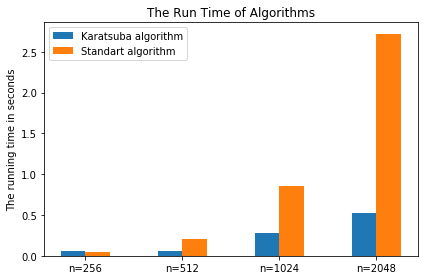

In [11]:
import matplotlib.pyplot as plt
import numpy as np


labels = []
for i in range(len(CasesN)):
    labels.append('n='+str(CasesN[i]))

x = np.arange(len(labels))
width = 0.25

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, timeRKaratsuba, width, label='Karatsuba algorithm')
rects2 = ax.bar(x + width/2, timeRStandart, width, label='Standart algorithm')

ax.set_ylabel('The running time in seconds')
ax.set_title('The Run Time of Algorithms')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
fig.tight_layout()

plt.show()